In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")

# Path to dataset files
data_path = '../data/store-sales-time-series-forecasting/'

# Load all datasets
train = pd.read_csv(os.path.join(data_path, 'train.csv'))
test = pd.read_csv(os.path.join(data_path, 'test.csv'))
stores = pd.read_csv(os.path.join(data_path, 'stores.csv'))
oil = pd.read_csv(os.path.join(data_path, 'oil.csv'))
holidays = pd.read_csv(os.path.join(data_path, 'holidays_events.csv'))
transactions = pd.read_csv(os.path.join(data_path, 'transactions.csv'))

# Convert date columns to datetime format
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

# Sort training data by date
train = train.sort_values('date')


In [2]:
# Display basic info about the training set
print("Training data overview:\n")
train.info()

# Check for missing values
print("\nMissing values:\n", train.isnull().sum())

# Number of unique stores and product families
print("\nNumber of unique stores:", train['store_nbr'].nunique())
print("Number of unique families:", train['family'].nunique())


Training data overview:

<class 'pandas.core.frame.DataFrame'>
Index: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 160.3+ MB

Missing values:
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Number of unique stores: 54
Number of unique families: 33


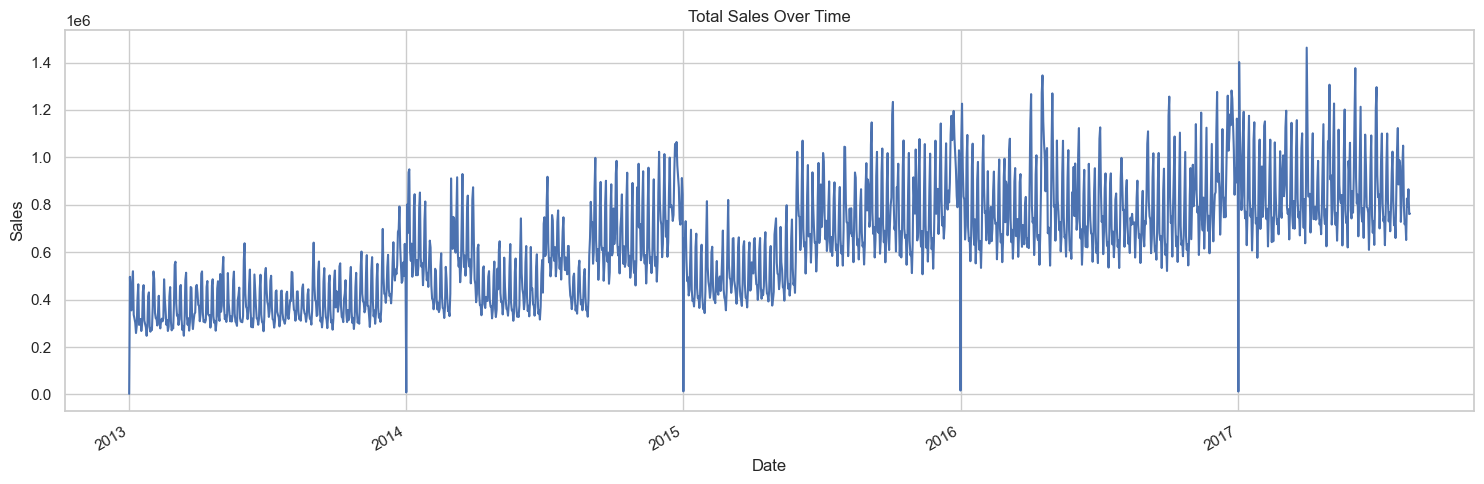

In [3]:
# Total sales over time
sales_by_date = train.groupby('date')['sales'].sum()

plt.figure(figsize=(15, 5))
sales_by_date.plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


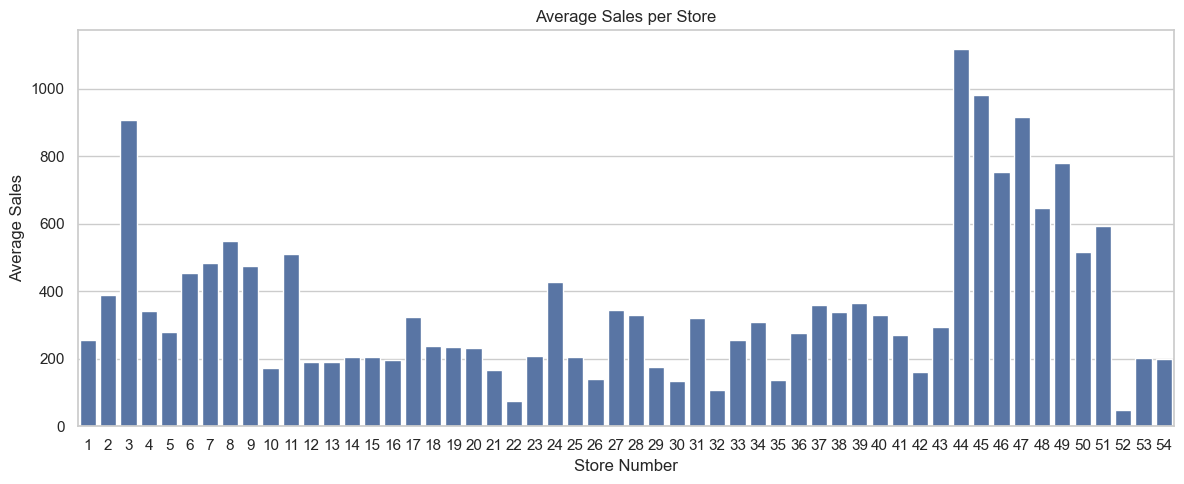

In [4]:
# Average sales per store
avg_sales_store = train.groupby('store_nbr')['sales'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(data=avg_sales_store, x='store_nbr', y='sales')
plt.title("Average Sales per Store")
plt.xlabel("Store Number")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()


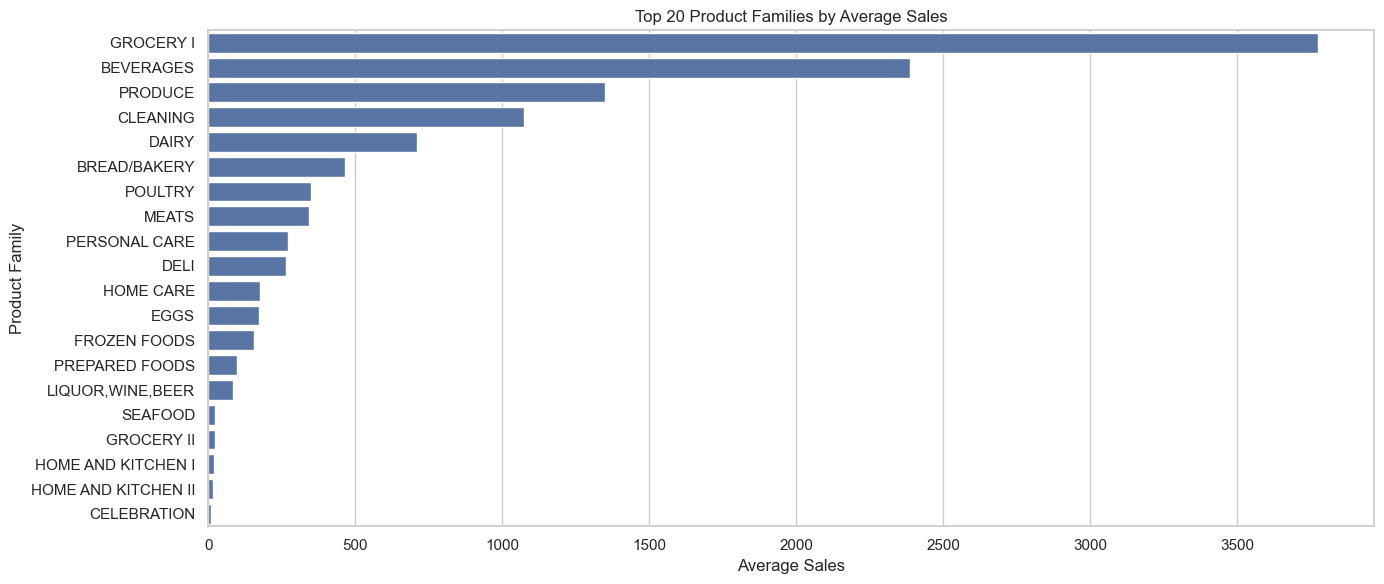

In [5]:
# Average sales per product family
avg_sales_family = train.groupby('family')['sales'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(x=avg_sales_family.values, y=avg_sales_family.index)
plt.title("Top 20 Product Families by Average Sales")
plt.xlabel("Average Sales")
plt.ylabel("Product Family")
plt.tight_layout()
plt.show()


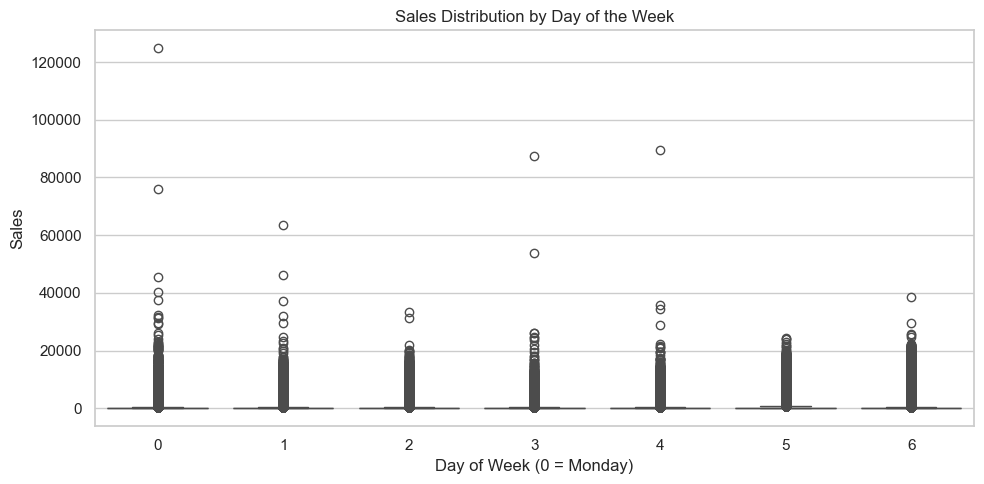

In [7]:
# Sales by day of the week
train['dayofweek'] = train['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday

plt.figure(figsize=(10, 5))
sns.boxplot(data=train, x='dayofweek', y='sales')
plt.title("Sales Distribution by Day of the Week")
plt.xlabel("Day of Week (0 = Monday)")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


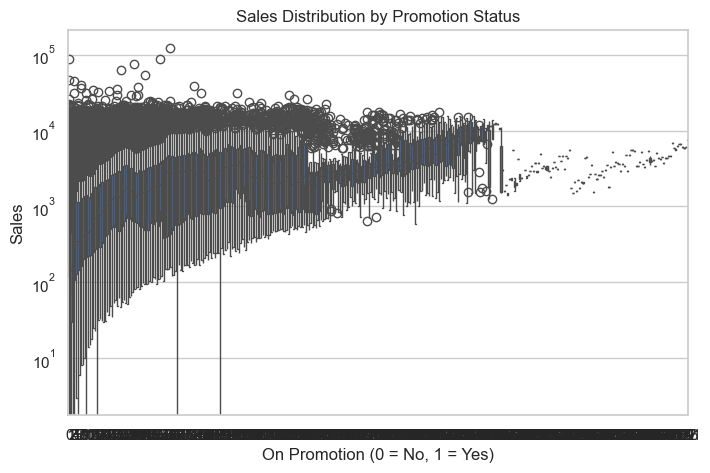

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=train, x='onpromotion', y='sales')
plt.title("Sales Distribution by Promotion Status")
plt.xlabel("On Promotion (0 = No, 1 = Yes)")
plt.ylabel("Sales")
plt.yscale('log')  # optional: helps reduce the impact of outliers
plt.show()

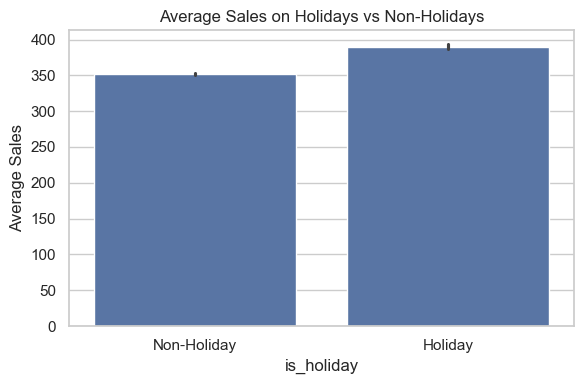

In [10]:
# Merge to identify holidays in train data
holiday_flags = holidays[['date']].drop_duplicates().copy()
holiday_flags['is_holiday'] = 1

train_holiday = pd.merge(train, holiday_flags, on='date', how='left')
train_holiday['is_holiday'] = train_holiday['is_holiday'].fillna(0)

plt.figure(figsize=(6,4))
sns.barplot(data=train_holiday, x='is_holiday', y='sales')
plt.title("Average Sales on Holidays vs Non-Holidays")
plt.xticks([0,1], ['Non-Holiday', 'Holiday'])
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()

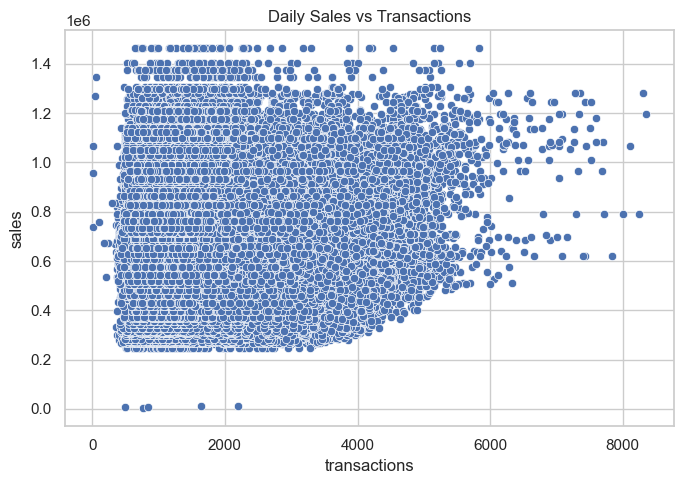

Correlation between transactions and sales: 0.09247773065402058


In [11]:
# Aggregate sales per date to match transactions
daily_sales = train.groupby('date')['sales'].sum().reset_index()
daily_data = pd.merge(daily_sales, transactions, on='date', how='left')

# Scatter plot
plt.figure(figsize=(7,5))
sns.scatterplot(data=daily_data, x='transactions', y='sales')
plt.title("Daily Sales vs Transactions")
plt.tight_layout()
plt.show()

# Correlation
print("Correlation between transactions and sales:",
      daily_data['sales'].corr(daily_data['transactions']))
